In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
tel = pd.read_csv('data/tel_data(전처리).csv', encoding='utf-8')
services = pd.read_csv('data/services_data(전처리).csv', encoding='cp949')
services = services.loc[:, ~services.columns.str.contains('^Unnamed')]

In [3]:
tel_selected = tel[['고객ID', '결제방법', '인터넷서비스유형']]

In [4]:
exclude_cols = [
    '온라인보안서비스여부', '온라인백업서비스여부', '기기보호서비스여부', 
    'TV스트리밍이용여부', 
 '무제한데이터이용여부', '계약기간유형', '분기'
]

In [5]:
services_selected = services.drop(columns=exclude_cols)

In [6]:
merged = pd.merge(tel_selected, services_selected, on='고객ID', how='inner')

In [7]:
merged_for_encoding = merged.drop(columns=['고객ID'])

In [8]:
types_info = merged_for_encoding.dtypes

In [9]:
object_cols = types_info[types_info == 'object'].index.tolist()
encoded = pd.get_dummies(merged_for_encoding, columns=object_cols, drop_first=False)

In [10]:
corr_matrix = encoded.corr()

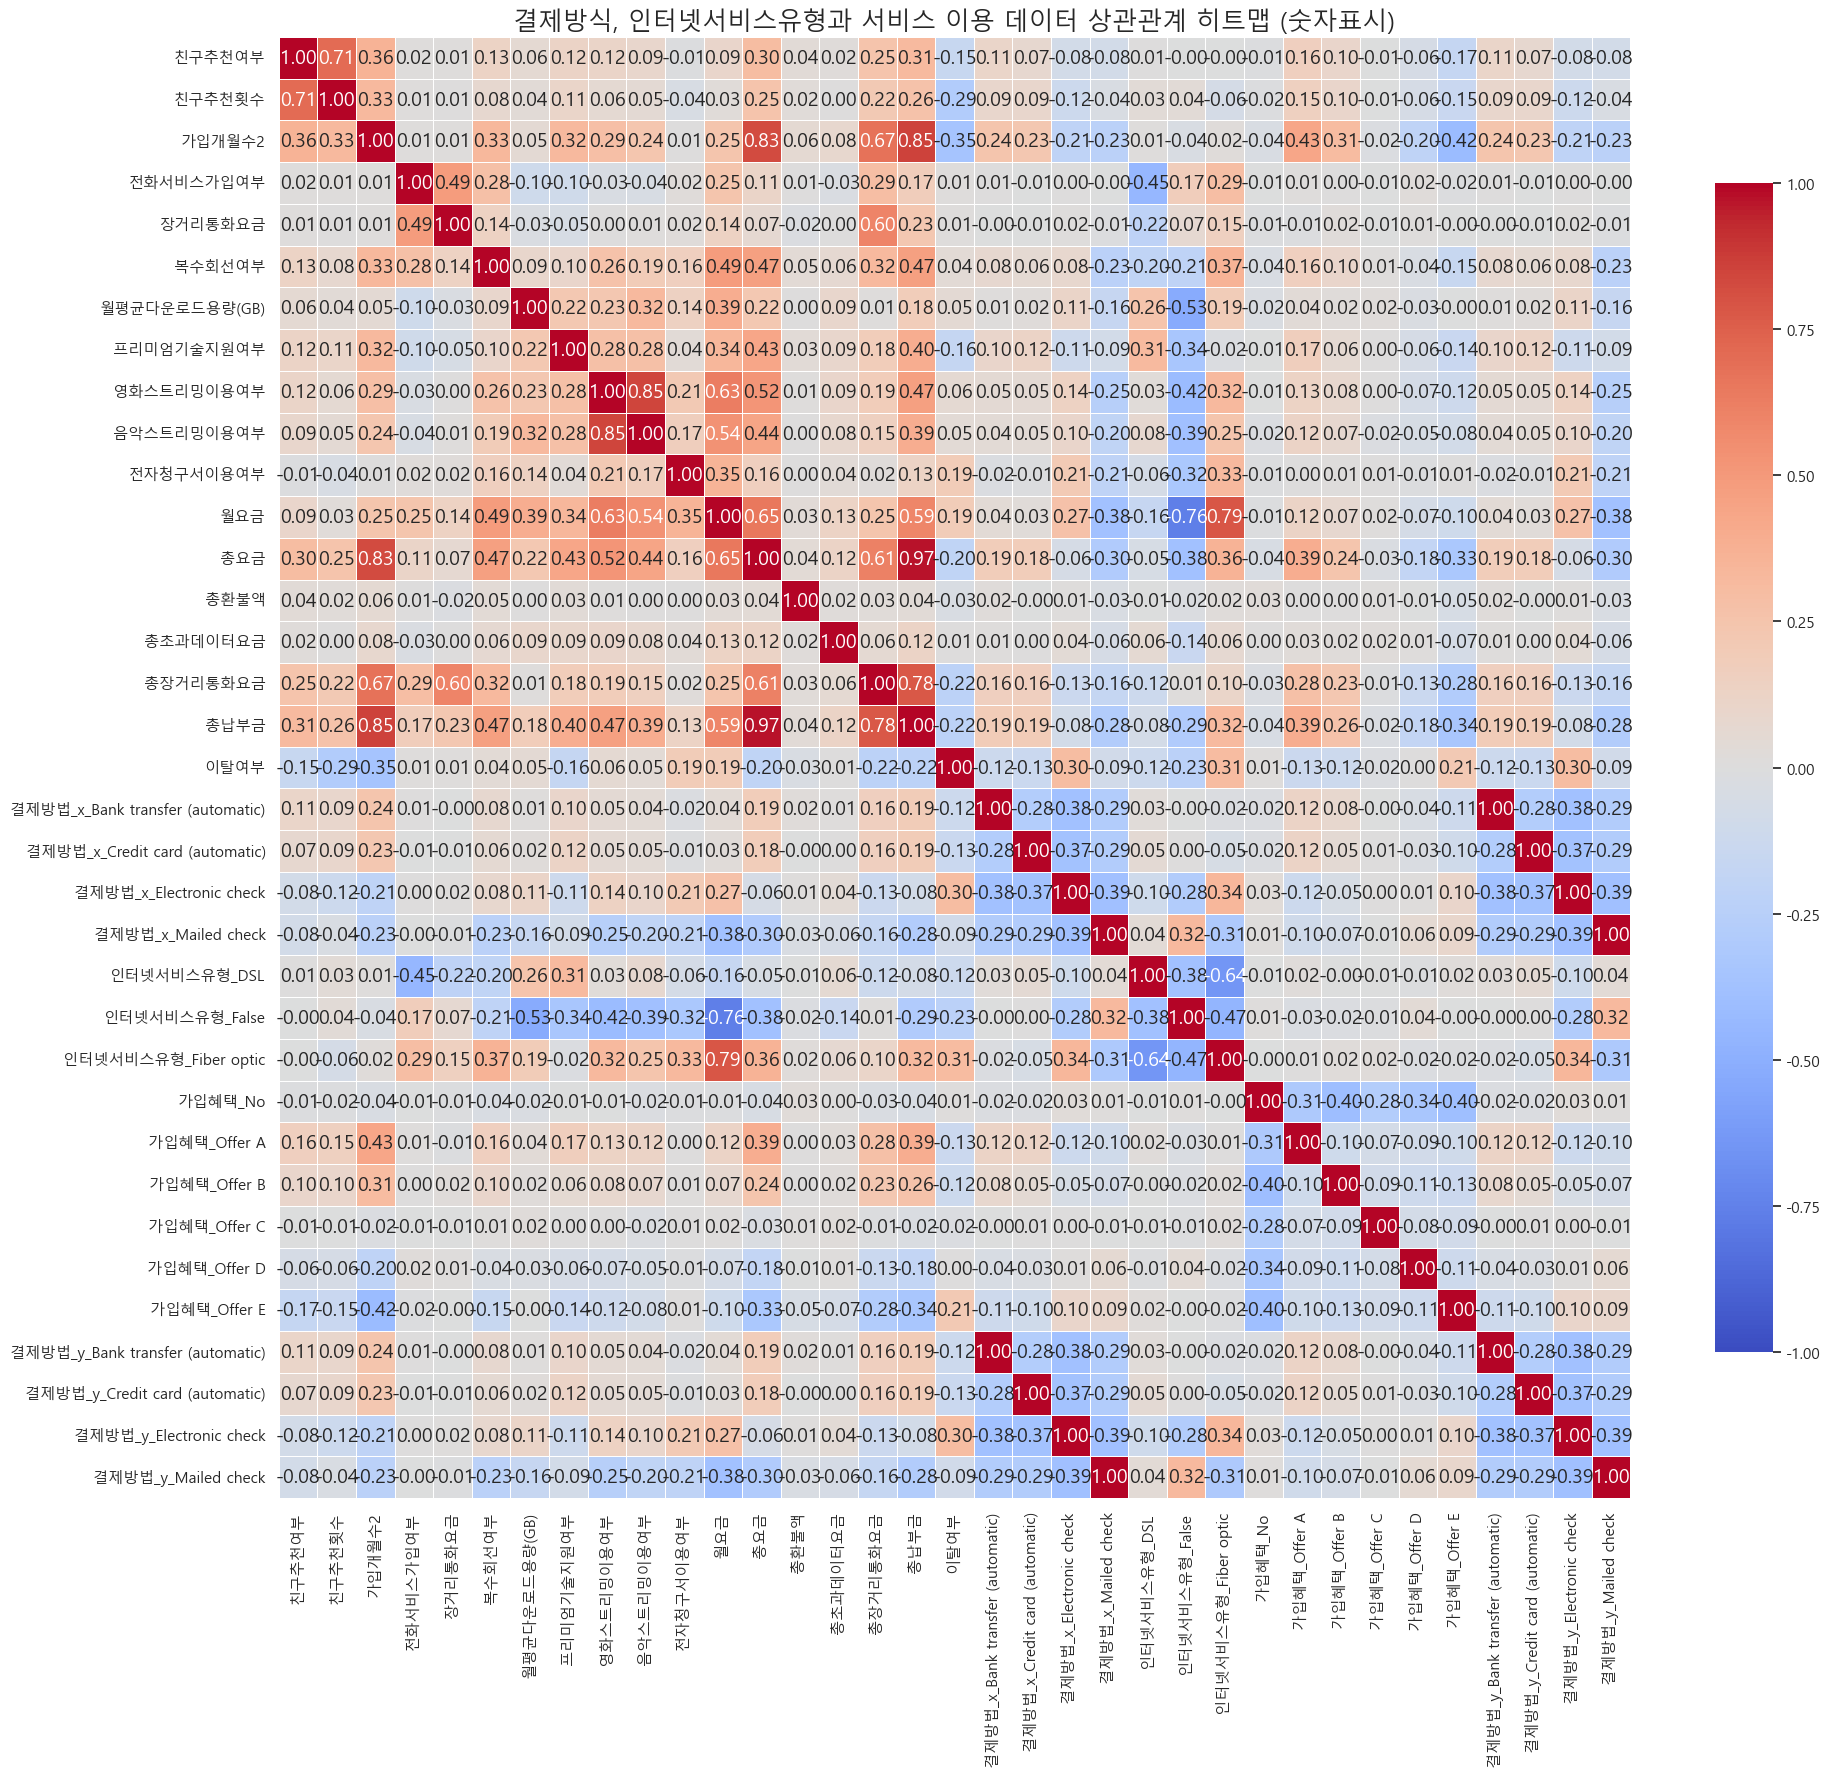

In [12]:

plt.figure(figsize=(20, 18))
sns.heatmap(
    corr_matrix,
    annot=True, fmt=".2f",  # 숫자 표시, 소수점 2자리
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)
plt.title('결제방식, 인터넷서비스유형과 서비스 이용 데이터 상관관계 히트맵 (숫자표시)', fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


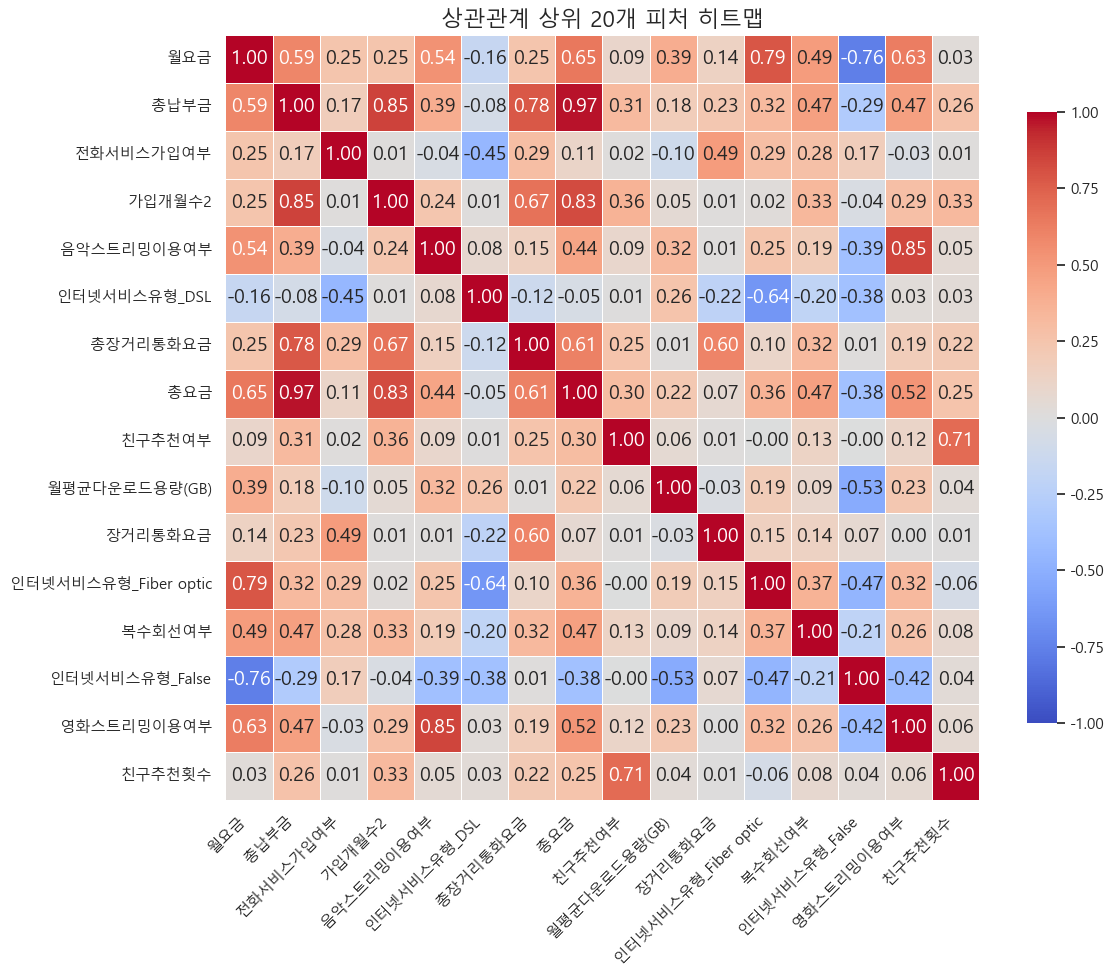

In [13]:
# 절댓값 기준 상관계수 정렬
corr_pairs = corr_matrix.abs().unstack()

# 자기 자신 (1.0) 제외하고, 중복 제거
sorted_corr = corr_pairs[corr_pairs < 1].sort_values(ascending=False).drop_duplicates()

# 상위 20개 추출
top_20_corr = sorted_corr.head(20).reset_index()
top_20_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']

# 상위 20개에 나오는 모든 피처 리스트 만들기
top_features = list(set(top_20_corr['Feature 1']).union(set(top_20_corr['Feature 2'])))

# 상위 20개 피처들의 서브 상관행렬
sub_corr = corr_matrix.loc[top_features, top_features]

# 부분 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(
    sub_corr,
    annot=True, fmt=".2f",
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)
plt.title('상관관계 상위 20개 피처 히트맵', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 위에 두개의 히트맵으로 알 수 있는점
- 인터넷 미가입자는 평균 다운로드량이 낮음(당연한 결과같음)
- Fiber optic 인터넷방식 사용하는 고객은 복수회선 이용비율이 높음
- e-check 결제방식 이용자는 월단위 계약이 많음
- Mailed check 결제방식 이용자는 인터넷 서비스를 신청하지
- 자동이체 고객은 복수회선 비율이 높음(0.24라 큰 의미가 있을지는 모르겠음)